In [26]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()
df = pd.DataFrame(iris["data"],
                  columns= iris["feature_names"]
                  )

df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [27]:
from sklearn.cluster import KMeans
cluster = KMeans(n_clusters=3)
cluster.fit(iris.data)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [28]:
df["label"] = cluster.labels_
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [29]:
cluster.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [30]:
cluster.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [31]:
# every K:score
from sklearn.metrics import silhouette_score
for k in range(2,20):
  test = KMeans(n_clusters=k)
  test.fit(iris["data"])
  score = silhouette_score(iris["data"], test.labels_)
  print("[K]:",k, "[Score]:", score)

[K]: 2 [Score]: 0.681046169211746
[K]: 3 [Score]: 0.5528190123564091
[K]: 4 [Score]: 0.4980505049972867
[K]: 5 [Score]: 0.4887488870931048
[K]: 6 [Score]: 0.3648340039670018
[K]: 7 [Score]: 0.34750423280461507
[K]: 8 [Score]: 0.3520039484603334
[K]: 9 [Score]: 0.33193334853298057
[K]: 10 [Score]: 0.32896473237511326
[K]: 11 [Score]: 0.30978424680035216
[K]: 12 [Score]: 0.2842562483682396
[K]: 13 [Score]: 0.3013140200502091
[K]: 14 [Score]: 0.28269754495769367
[K]: 15 [Score]: 0.28733780346071464
[K]: 16 [Score]: 0.30117248450203715
[K]: 17 [Score]: 0.28863923578811385
[K]: 18 [Score]: 0.27508764191452567
[K]: 19 [Score]: 0.2803753184753021


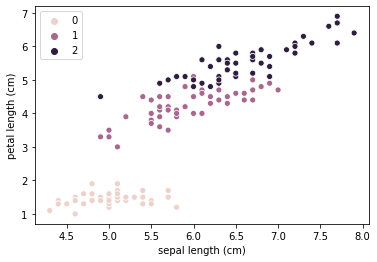

In [33]:
# seaborn
import seaborn as sns
sns.scatterplot(x=df["sepal length (cm)"],
                y=df["petal length (cm)"],
                hue=iris["target"])


In [37]:
# Mac + PyCahrm: [SSL CERTIFICATION FAILED]
# import ssl
# ssl._create_default_https_content = ssl._create_unverified_conten

from urllib.request import urlretrieve
# urlretrieve(網址,檔名)
url="https://github.com/Elwing-Chou/MLDemo3/raw/master/poem_train.csv"
urlretrieve(url,"train.csv")

url="https://github.com/Elwing-Chou/MLDemo3/raw/master/poem_test.csv"
urlretrieve(url,"test.csv")

('test.csv', <http.client.HTTPMessage at 0x7fdfd7b8bd30>)

In [42]:
import pandas as pd
train_df = pd.read_csv("train.csv",encoding="utf-8")
train_df

,作者,詩名,內容
0,李白,菩薩蠻·平林漠漠煙如織,平林漠漠煙如織，寒山一帶傷心碧。\r\n暝色入高樓，有人樓上愁。玉階空佇立，宿鳥歸飛急。\r...
1,李白,把酒問月,青天有月來幾時，我今停杯一問之：人攀明月不可得，月行卻與人相隨？皎如飛鏡臨丹闕，綠煙滅儘清輝...
2,李白,春思,燕草如碧絲，秦桑低綠枝。當君懷歸日，是妾斷腸時。春風不相識，何事入羅幃。
3,李白,春夜洛城聞笛,誰家玉笛暗飛聲，散入春風滿洛城。此夜曲中聞折柳，何人不起故園情。
4,李白,古風 其十九,西上蓮花山，迢迢見明星。(西上 一作：西嶽)素手把芙蓉，虛步躡太清。霓裳曳廣帶，飄拂升天行。...
...,...,...,...
2726,白居易,彆元九後詠所懷,零落桐葉雨，蕭條槿花風。悠悠早秋意，生此幽閒中。況與故人彆，中懷正無悰。勿雲不相送，心到青門...
2727,白居易,早秋曲江感懷,離離暑雲散，嫋嫋涼風起。池上秋又來，荷花半成子。朱顏易銷歇，白日無窮已。人壽不如山，年光急於...
2728,白居易,東墟晚歇 時退居渭村。,涼風冷露蕭索天，黃蒿紫菊荒涼田。繞塚秋花少顏色，細蟲小蝶飛翻翻。中有騰騰獨行者，手拄漁竿不騎...
2729,白居易,南秦雪,往歲曾為西邑吏，慣從駱口到南秦。\r\n三時雲冷多飛雪，二月山寒少有春。\r\n我思舊事猶惆...


In [41]:
test_df = pd.read_csv("test.csv",encoding="utf-8")
test_df

,作者,詩名,內容
0,李白,望廬山瀑布,日照香爐生紫煙，遙看瀑布掛前川。飛流直下三千尺，疑是銀河落九天。
1,李白,早發白帝城,朝辭白帝彩雲間，千裡江陵一日還。兩岸猿聲啼不住，輕舟已過萬重山。
2,李白,贈汪倫,李白乘舟將欲行，忽聞岸上踏歌聲。桃花潭水深千尺，不及汪倫送我情。
3,李白,送孟浩然之廣陵,故人西辭黃鶴樓，煙花三月下揚州。孤帆遠影碧空儘，唯見長江天際流。
4,李白,夜宿山寺,危樓高百尺，手可摘星辰。不敢高聲語，恐驚天上人。
5,李白,靜夜思,床前明月光，疑是地上霜。舉頭望明月，低頭思故鄉。
6,李白,望天門山,天門中斷楚江開，碧水東流至此回。兩岸青山相對出，孤帆一片日邊來。
7,李白,獨坐敬亭山,眾鳥高飛儘，孤雲獨去閒。相看兩不厭，隻有敬亭山。
8,李白,登金陵鳳凰台,鳳凰台上鳳凰遊，鳳去台空江自流。吳宮花草埋幽徑，晉代衣冠成古丘。三山半落青天外，二水中分白鷺...
9,李白,渡荊門送彆,渡遠荊門外，來從楚國遊。山隨平野儘，江入大荒流。月下飛天境，雲生結海樓。仍憐故鄉水，萬裡送行舟。
